# Exercise 6 - Visualising Variance Reduction with Manual PCA

This exercise will walk us through this process so we can see how much information has been discarded by the PCA transformation, using the manual PCA process.

Import the pandas, Numpy and matplotlib plotting library.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read in the Sepal features from the Iris dataset

In [2]:
df = pd.read_csv('iris-data.csv')[['Sepal Length', 'Sepal Width']]
df.head()

,Sepal Length,Sepal Width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


Centre the dataset around 0, by subtracting the respective means

In [3]:
means = np.mean(df.values, axis=0)
means

array([5.84333333, 3.054     ])

In [4]:
data = df.values - means
data

array([[-0.74333333,  0.446     ],
       [-0.94333333, -0.054     ],
       [-1.14333333,  0.146     ],
       [-1.24333333,  0.046     ],
       [-0.84333333,  0.546     ],
       [-0.44333333,  0.846     ],
       [-1.24333333,  0.346     ],
       [-0.84333333,  0.346     ],
       [-1.44333333, -0.154     ],
       [-0.94333333,  0.046     ],
       [-0.44333333,  0.646     ],
       [-1.04333333,  0.346     ],
       [-1.04333333, -0.054     ],
       [-1.54333333, -0.054     ],
       [-0.04333333,  0.946     ],
       [-0.14333333,  1.346     ],
       [-0.44333333,  0.846     ],
       [-0.74333333,  0.446     ],
       [-0.14333333,  0.746     ],
       [-0.74333333,  0.746     ],
       [-0.44333333,  0.346     ],
       [-0.74333333,  0.646     ],
       [-1.24333333,  0.546     ],
       [-0.74333333,  0.246     ],
       [-1.04333333,  0.346     ],
       [-0.84333333, -0.054     ],
       [-0.84333333,  0.346     ],
       [-0.64333333,  0.446     ],
       [-0.64333333,

Use Manual PCA to transform the data on the basis of the first principal component.

In [5]:
eigenvectors, eigenvalues, _ = np.linalg.svd(np.cov(data.T), full_matrices=False)
P = eigenvectors[0]
P

array([-0.99693955,  0.07817635])

Transform the data into the lower dimension space

In [6]:
data_transformed = P.dot(data.T)

Reshape the principal components for later use.

In [7]:
P = P.reshape((-1, 1))

To compute the inverse transform of the reduced dataset we need to restore the selected eigenvectors into the higher dimensional space.  To do this we will invert the matrix.

In [8]:
P_transformed = np.linalg.pinv(P)
P_transformed

array([[-0.99693955,  0.07817635]])

Prepare the transformed data for use in the matrix multiplication

In [9]:
data_transformed = data_transformed.reshape((-1, 1))

Compute the inverse transform of the reduced data and plot the result to visualise the effect of removing the variance from the data.

In [10]:
data_restored = data_transformed.dot(P_transformed)
data_restored

array([[-7.73550366e-01,  6.06589915e-02],
       [-9.33359508e-01,  7.31906401e-02],
       [-1.14772462e+00,  9.00003684e-02],
       [-1.23931976e+00,  9.71829241e-02],
       [-8.80732922e-01,  6.90638556e-02],
       [-5.06558669e-01,  3.97224787e-02],
       [-1.26270089e+00,  9.90163868e-02],
       [-8.65145502e-01,  6.78415472e-02],
       [-1.42251003e+00,  1.11548035e-01],
       [-9.41153218e-01,  7.38017944e-02],
       [-4.90971249e-01,  3.85001703e-02],
       [-1.06392319e+00,  8.34289670e-02],
       [-1.03274835e+00,  8.09843500e-02],
       [-1.52969258e+00,  1.19952900e-01],
       [-1.16796996e-01,  9.15879336e-03],
       [-2.47360681e-01,  1.93971202e-02],
       [-5.06558669e-01,  3.97224787e-02],
       [-7.73550366e-01,  6.06589915e-02],
       [-2.00598421e-01,  1.57301948e-02],
       [-7.96931496e-01,  6.24924542e-02],
       [-4.67590119e-01,  3.66667076e-02],
       [-7.89137786e-01,  6.18813000e-02],
       [-1.27828831e+00,  1.00238695e-01],
       [-7.

Add the means back to the transformed data

In [11]:
data_restored += means

Visualise the result

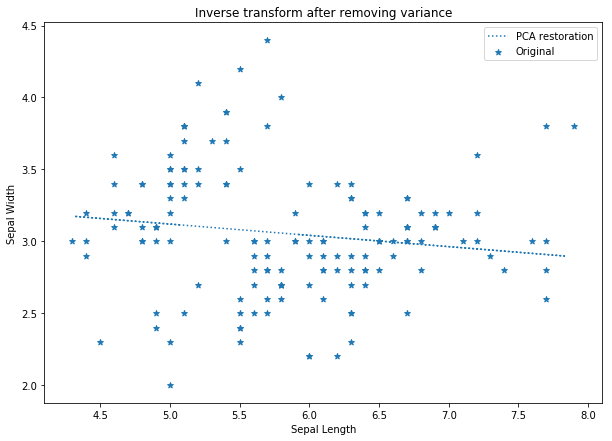

In [12]:
plt.figure(figsize=(10, 7))
plt.plot(data_restored[:,0], data_restored[:,1], linestyle=':', label='PCA restoration');
plt.scatter(df['Sepal Length'], df['Sepal Width'], marker='*', label='Original');
plt.legend();
plt.xlabel('Sepal Length');
plt.ylabel('Sepal Width');
plt.title('Inverse transform after removing variance');

There are only two components of variation in this dataset.  If we do not remove any of the components what is the result of the inverse transform?  Again transform the data into the lower dimensional space, but this time using all of the eigenvectors.

In [13]:
P = eigenvectors
data_transformed = P.dot(data.T)

Transpose *data_transformed* to put it into the correct shape for matrix mutliplication.

In [14]:
data_transformed = data_transformed.T

Now restore the data back to the higher dimensional space

In [15]:
data_restored = data_transformed.dot(P)
data_restored

array([[-0.74333333,  0.446     ],
       [-0.94333333, -0.054     ],
       [-1.14333333,  0.146     ],
       [-1.24333333,  0.046     ],
       [-0.84333333,  0.546     ],
       [-0.44333333,  0.846     ],
       [-1.24333333,  0.346     ],
       [-0.84333333,  0.346     ],
       [-1.44333333, -0.154     ],
       [-0.94333333,  0.046     ],
       [-0.44333333,  0.646     ],
       [-1.04333333,  0.346     ],
       [-1.04333333, -0.054     ],
       [-1.54333333, -0.054     ],
       [-0.04333333,  0.946     ],
       [-0.14333333,  1.346     ],
       [-0.44333333,  0.846     ],
       [-0.74333333,  0.446     ],
       [-0.14333333,  0.746     ],
       [-0.74333333,  0.746     ],
       [-0.44333333,  0.346     ],
       [-0.74333333,  0.646     ],
       [-1.24333333,  0.546     ],
       [-0.74333333,  0.246     ],
       [-1.04333333,  0.346     ],
       [-0.84333333, -0.054     ],
       [-0.84333333,  0.346     ],
       [-0.64333333,  0.446     ],
       [-0.64333333,

Add the means back

In [16]:
data_restored += means

Visualise the restored data

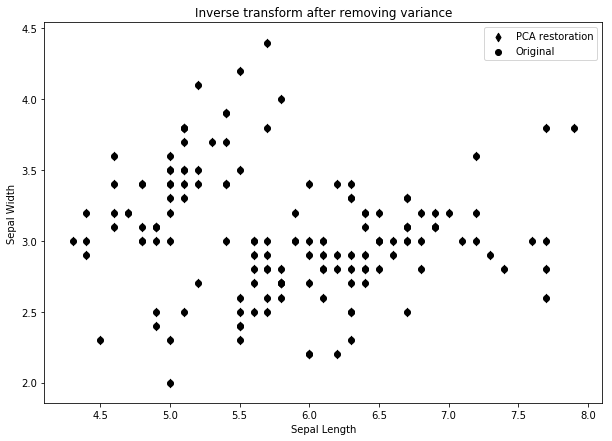

In [17]:
plt.figure(figsize=(10, 7))
plt.scatter(data_restored[:,0], data_restored[:,1], marker='d', label='PCA restoration', c='k');
plt.scatter(df['Sepal Length'], df['Sepal Width'], marker='o', label='Original', c='k');
plt.legend();
plt.xlabel('Sepal Length');
plt.ylabel('Sepal Width');
plt.title('Inverse transform after removing variance');